# Imports

In [9]:
%run ~/pomsync/lab/GIS/boilerplate_gis.py

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
# Get exmaple files
# (Make this wherever you've copied the data on your local machine)
data_dir = os.path.expanduser('~/pomsync/lab/GIS/')
ff = sorted(glob.glob(data_dir + 'example_data/*'))

In [11]:
ff

['/home/hunter/hunter_sync/lab/GIS/example_data/mystream_5_20_14_10_56.csv',
 '/home/hunter/hunter_sync/lab/GIS/example_data/mystream_5_20_14_6_38.csv',
 '/home/hunter/hunter_sync/lab/GIS/example_data/mystream_5_20_16_43_43.csv',
 '/home/hunter/hunter_sync/lab/GIS/example_data/mystream_5_21_8_8_30.csv']

In [12]:
# Load useful shape files
reno_map = geopandas.read_file(data_dir + 'Reno_city_limits/Reno_City_Limits.shp')
campus_buildings = geopandas.read_file(data_dir + 'UNR_Building_Footprints_02172021/UNR_Buildings_footprint_02172021.shp')


In [13]:
gt, pos_commute = parse_sensorstream_gps(ff[2], 'gps')

# Long way:

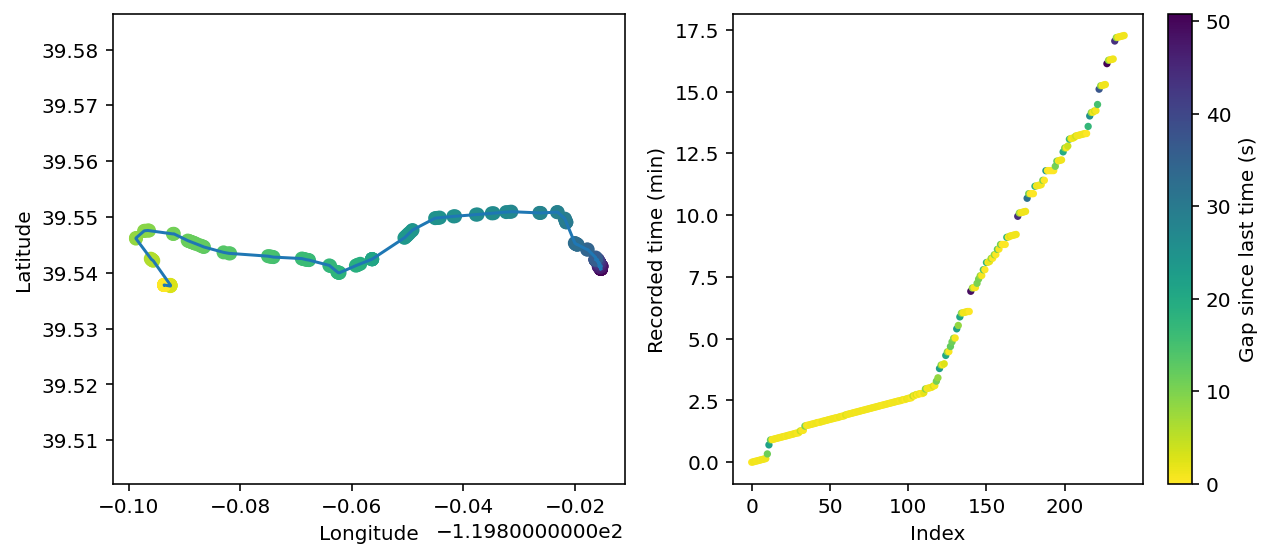

In [14]:
# Plot basic latitude and longitude, with time overlaid 
pos_commute = types.SimpleNamespace(**pos_commute)
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].plot(pos_commute.gps_lon, pos_commute.gps_lat, '-')
axs[0].scatter(pos_commute.gps_lon, pos_commute.gps_lat, c=gt, cmap='viridis')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].axis('equal')
td = np.hstack([[0], np.diff(gt)])
hh = axs[1].scatter(range(len(gt)), (gt-gt[0])/60, c=td, s=7, cmap='viridis_r')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Recorded time (min)')
cb = plt.colorbar(hh)
cb.set_label('Gap since last time (s)')
plt.tight_layout()

# Short way

/home/hunter/hunter_sync/lab/GIS/boilerplate_gis.py:82: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  ctx.add_basemap(ax, source=ctx.sources.OSM_A)


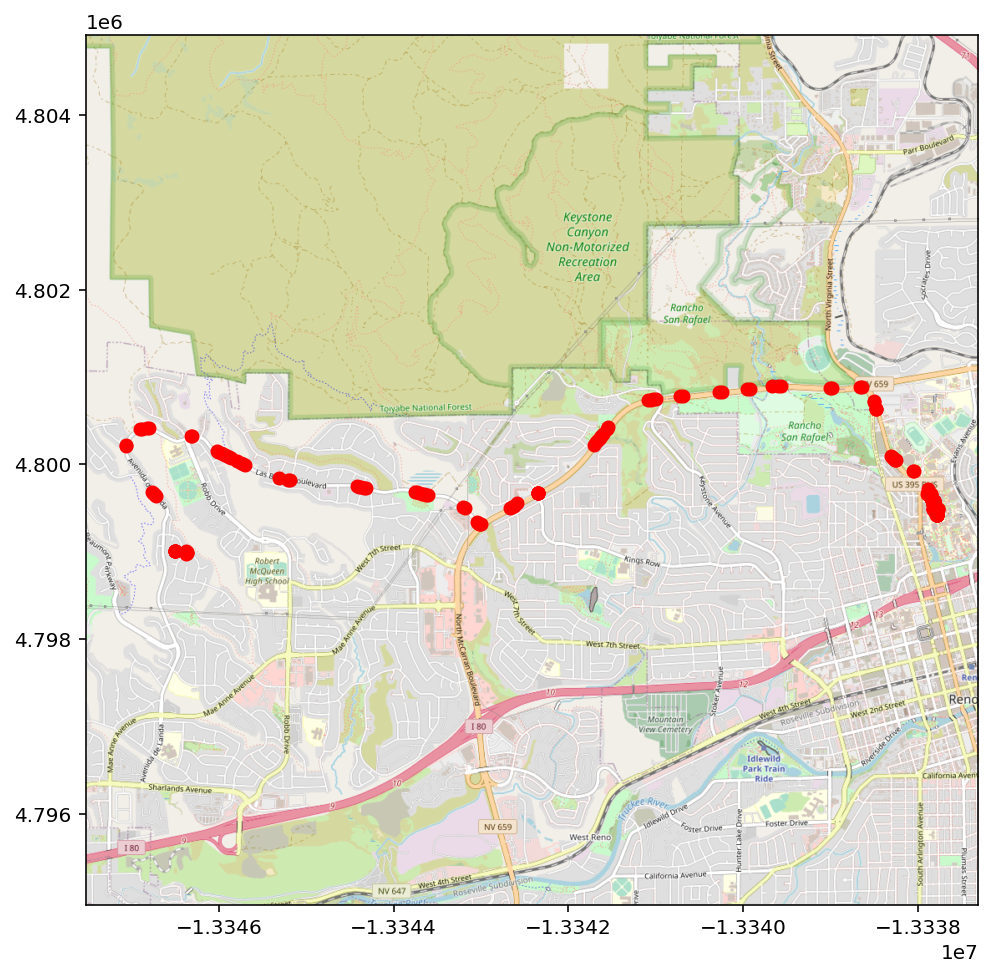

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_on_map(pos_commute, reno_map, ax=ax, set_min_max=True)
ax.plot(pos_commute.gps_lon, pos_commute.gps_lat, '-')

In [16]:
# Load file
gt, pos_campus = parse_sensorstream_gps(ff[0], 'gps')

/home/hunter/hunter_sync/lab/GIS/boilerplate_gis.py:82: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  ctx.add_basemap(ax, source=ctx.sources.OSM_A)


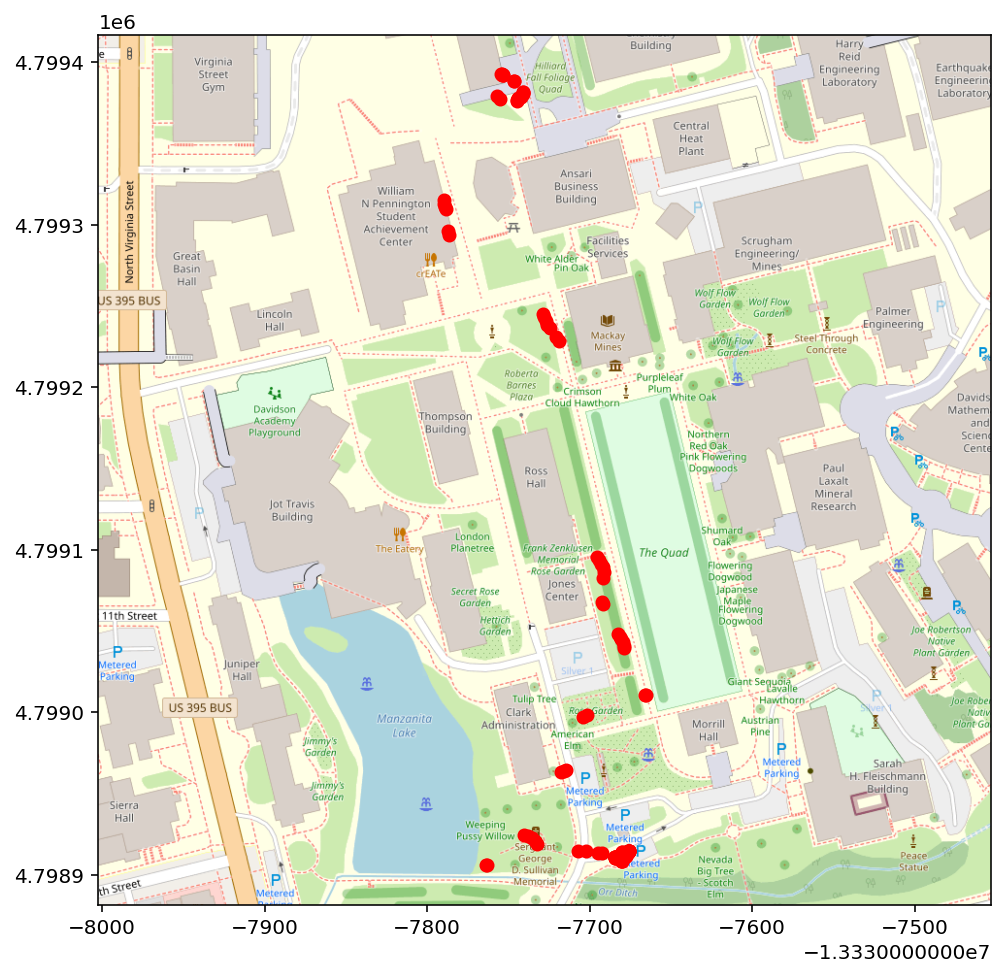

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
plot_on_map(pos_campus, campus_buildings, ax=ax, set_min_max=True)